<a href="https://colab.research.google.com/github/Dimimano/Insurance-Cross-Sell-Prediction-using-TF-Keras/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b>Neural Networks Assignment: </b></h1></center>
<center><h1> <b>Insurance Cross Sell Prediction using TF Keras</b></h1></center>
<br>

## Table of contents
* [Introduction](#introduction)
* [Data cleaning](#data)
* [Exploratory Data Analysis](#methodology)
* [Data Preprocessing](#data)
* [Modeling](#analysis)
* [Conclusion](#conclusion)

<h2><b>1. Introduction</b></h2>

<h3><b>About the Problem</b></h3>


Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for companies because they can then accordingly plan their communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, information is given about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<h3><b>About the Data </b></h3>

*   **id:** Unique ID for the customer
*   **Gender:** Gender of the customer
*   **Age:** Age of the customer
*   **Driving_License:** 0 --> Customer does not have DL,    1 --> Customer already has DL

*   **Region_Code:** Unique code for the region of the customer
*   **Previously_Insured:** 0 --> Customer doesn't have Vehicle Insurance,    1 --> Customer already has Vehicle Insurance
*   **Vehicle_Age:** Age of the Vehicle
*   **Vehicle_Damage:** 0 --> Customer didn't get his/her vehicle damaged in the past,    1 --> Customer got his/her vehicle damaged in the past
*  **Annual_Premium:** The amount customer needs to pay as premium in the year
*  **PolicySalesChannel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
*  **Vintage:** Number of Days, Customer has been associated with the company
*  **Response:** 0 --> Customer in not interested 1 --> Customer is interested





<h2><b>2. Data cleaning</b></h2>

Before creating any model it is necessary to prepare the data and check for missing, invalid or duplicated values.

In [ ]:
#Import libraries:

# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
a4_dims = (11.7, 8.27)

# Modeling
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Networks
import tensorflow as tf
from tensorflow import keras

# Resampling
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Classification matrix for evaluation.
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
#Import the train dataset.
df_train = pd.read_csv('drive/MyDrive/train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#Dimensions of train dataset.
df_train.shape

(381109, 12)

The train dataset containts 381109 records. The id column does not offer any information so it is removed.

In [ ]:
#Remove 'id' column from both datasets.
df_train = df_train.drop(['id'], axis=1)
df_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

The dataset contains zero NULL values.

In [ ]:
#Check for null values.
df_train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Each column needs to be checked for invalid values. For example anything other than 'Male' or 'Female' in the Gender column is invalid.

In [ ]:
# Unique values for all the columns
for col in df_train.columns[~(df_train.columns.isin(['age', 'id', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']))].tolist():
    print(" Unique Values --> " + col, ':', len(df_train[col].unique()), ': ', df_train[col].unique())
    print()

 Unique Values --> Gender : 2 :  ['Male' 'Female']

 Unique Values --> Age : 66 :  [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

 Unique Values --> Driving_License : 2 :  [1 0]

 Unique Values --> Region_Code : 53 :  [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

 Unique Values --> Previously_Insured : 2 :  [0 1]

 Unique Values --> Vehicle_Age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']

 Unique Values --> Vehicle_Damage : 2 :  ['Yes' 'No']

 Unique Values --> Annual_Premium : 48838 :  [ 40454.  33536.  38294. ...  20706. 101664.  69845.]

 Unique Values --> Policy_Sales_Channel : 155 :  [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  

None of the columns looks like they include invalid values.

<h2><b>3. Exploratory Data Analysis</b></h2>

<p> In this section, most of the data is visualized and summarized in order to summarize the dataset's main characterestics and gain insight into its underlying  structure. </p>

<h3><b>Target Value - Response</b></h3>

In [ ]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [ ]:
print('Only ' + str(round((46710/(46710+334399)*100),2)) + '% of the clients in the dataset, buy a vehicle insurance.')

Only 12.26% of the clients in the dataset, buy a vehicle insurance.


Text(0.5, 1.0, 'Response Distribution')

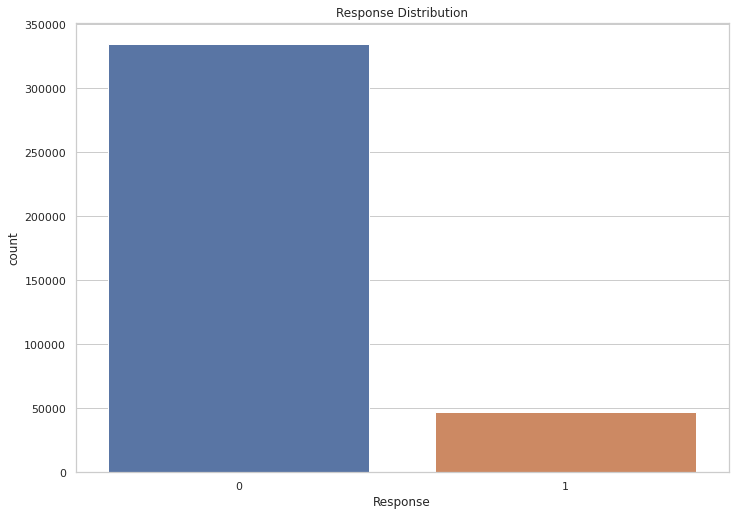

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.countplot(x='Response', data=df_train)
b.set_title("Response Distribution")

Looking at the plot it is obvious that there is an imbalance in the dataset. Just 12.26% of the clients in the dataset bought a vehicle insurance and this imbalance may become an issue later on when the selected neural network makes predictions.

<h3><b>Gender</b></h3>

Text(0.5, 1.0, 'Gender Distribution')

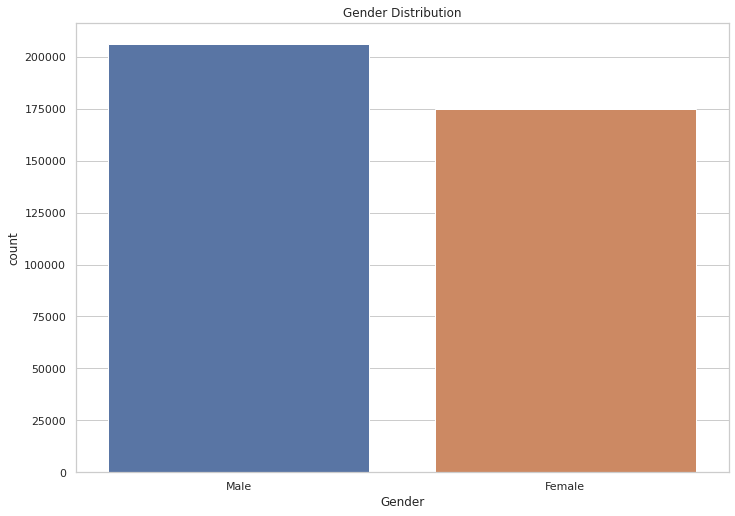

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.countplot(ax=ax,x='Gender', data=df_train)
b.set_title("Gender Distribution")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

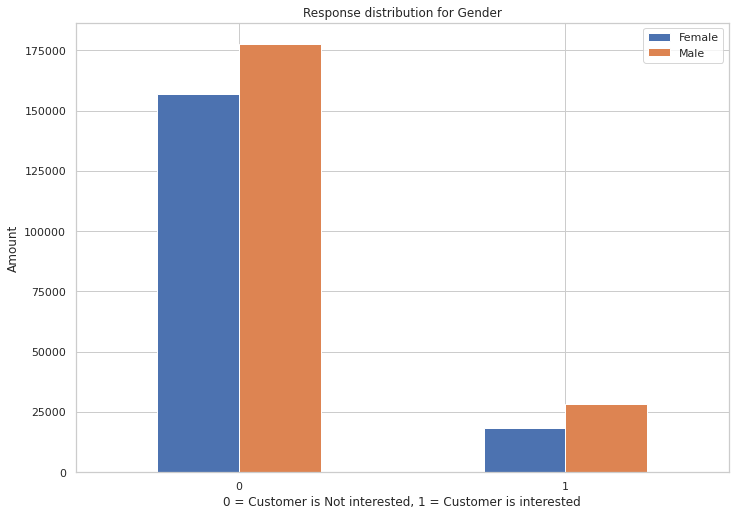

In [ ]:
pd.crosstab(df_train['Response'], df_train['Gender']).plot(kind="bar", figsize=a4_dims)

plt.title("Response distribution for Gender")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

Positive and negative responses are equally distributed among the two Genders.

<h3><b>Age</b></h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

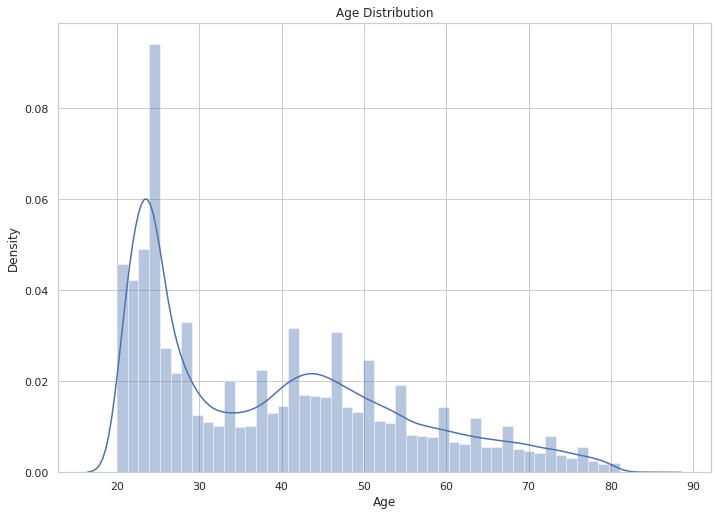

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.distplot(df_train['Age'])
b.set_title("Age Distribution")

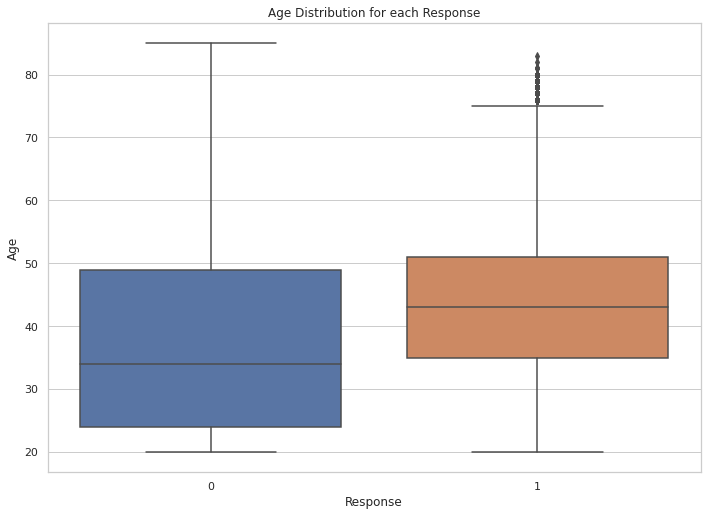

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
b = sns.boxplot(y='Age', x='Response', data=df_train);
b.set_title("Age Distribution for each Response");

Most of the customers are aged around 25 years old. However, the average age of the customers that are positive to a vehicle insurance is at 35-50 years old.

<h3><b>Driving Licence</b></h3>

In [ ]:
df_train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<p> There are only a few of customers without a Driver's Licence so it is wise to not include this feature in the data. </p>

In [ ]:
df_train = df_train.drop("Driving_License", axis=1)

<h3><b>Previously Insured</b></h3>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

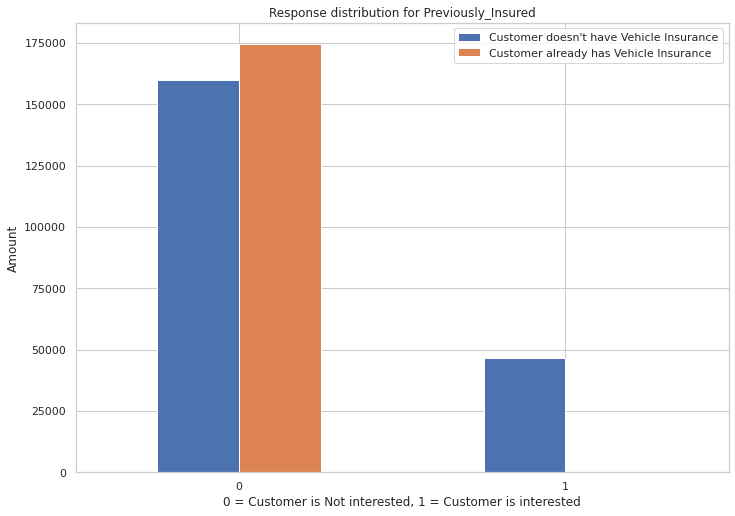

In [ ]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured']).plot(kind="bar", figsize=a4_dims)

plt.title("Response distribution for Previously_Insured")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Customer doesn't have Vehicle Insurance", "Customer already has Vehicle Insurance"])
plt.xticks(rotation=0)

<p> Only customers that do not already have a Vehicle Insurance are interested to purchase one. </p>

<h3><b>Vehicle Age</b></h3>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

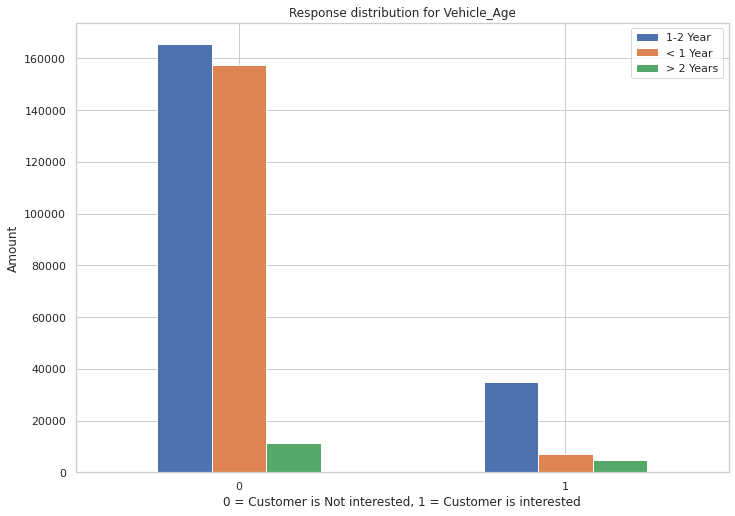

In [ ]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Age']).plot(kind="bar", figsize=a4_dims)

plt.title("Response distribution for Vehicle_Age")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["1-2 Year", "< 1 Year", "> 2 Years"])
plt.xticks(rotation=0)

<p> At first, it seems that mostly customers with new cars are interested to buy a vehicle insurance (as it is natural) but it is also true that most customers own new cars (hence, bumping the numbers) and a very high percentage of the customers that own old cars are interested into buying a vehicle insurance. </p>

<h3><b>Vehicle Damage</b></h3>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

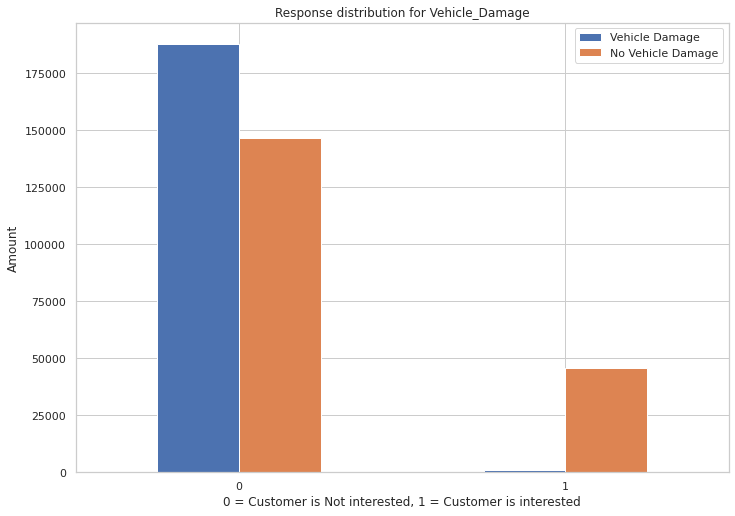

In [ ]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Damage']).plot(kind="bar", figsize=a4_dims)

plt.title("Response distribution for Vehicle_Damage")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Vehicle Damage", "No Vehicle Damage"])
plt.xticks(rotation=0)

As it is expected, mostly customers with undamaged cars are interested for a vehicle insurance.

<h2><b>4. Data Preprocessing</b></h2>

<p> Before moving on creating neural networks and making predictions it is necessary to preprocess the data and convert them into the right format. In most cases (e.g Gender) the conversion are pretty simple since most of the variables are binary and are coded as -1 and 1 while others only need to be converted to integers (e.g. Region Code). </p>
<p> However, in the case of Vehicle Age variable a more complex encoding is used, named level encoding as it tries to capture every level of information this variable includes. </p>

In [ ]:
gender = {'Male': -1, 'Female': 1}
previously_insured = {0: -1, 1: 1}
vehicle_damage = {'Yes': 1, 'No': -1}
df_train['Vehicle_Age_Over_Year'] = ''
df_train['Vehicle_Age_Over_2Years'] = ''

def level_encoding1(x):
  if x == '> 2 Years':
    return 1
  elif x == '1-2 Year':
    return 1
  else:
    return 0

def level_encoding2(x):
  if x == '> 2 Years':
    return 1
  elif x == '1-2 Year':
    return 0
  else:
    return 0


def preprocess(df):
    df['Gender'] = df['Gender'].map(gender)
    df['Previously_Insured'] = df['Previously_Insured'].map(previously_insured)
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map(vehicle_damage)
    df['Vehicle_Age_Over_Year'] = df['Vehicle_Age'].apply(lambda x: level_encoding1(x))
    df['Vehicle_Age_Over_2Years'] = df['Vehicle_Age'].apply(lambda x: level_encoding2(x))
    df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].apply(lambda x: np.int(x))
    df['Region_Code'] = df['Region_Code'].apply(lambda x: np.int(x))

    return df

In [ ]:
df_train.describe()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
preprocess(df_train)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Over_Year,Vehicle_Age_Over_2Years
0,-1,44,28,-1,> 2 Years,1,40454.0,26,217,1,1,1
1,-1,76,3,-1,1-2 Year,-1,33536.0,26,183,0,1,0
2,-1,47,28,-1,> 2 Years,1,38294.0,26,27,1,1,1
3,-1,21,11,1,< 1 Year,-1,28619.0,152,203,0,0,0
4,1,29,41,1,< 1 Year,-1,27496.0,152,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,-1,74,26,1,1-2 Year,-1,30170.0,26,88,0,1,0
381105,-1,30,37,1,< 1 Year,-1,40016.0,152,131,0,0,0
381106,-1,21,30,1,< 1 Year,-1,35118.0,160,161,0,0,0
381107,1,68,14,-1,> 2 Years,1,44617.0,124,74,0,1,1


In [ ]:
df_train = df_train.drop('Vehicle_Age', axis=1)

In [ ]:
df_train.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_Over_Year', 'Vehicle_Age_Over_2Years'],
      dtype='object')

In [ ]:
df_train.describe()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Over_Year,Vehicle_Age_Over_2Years
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,-0.081523,38.822584,26.388807,-0.083580,0.009753,30564.389581,112.034295,154.347397,0.122563,0.567615,0.042001
std,0.996673,15.511611,13.229888,0.996502,0.999954,17213.155057,54.203995,83.671304,0.327936,0.495408,0.200592
min,-1.000000,20.000000,0.000000,-1.000000,-1.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,-1.000000,25.000000,15.000000,-1.000000,-1.000000,24405.000000,29.000000,82.000000,0.000000,0.000000,0.000000
50%,-1.000000,36.000000,28.000000,-1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000,1.000000,0.000000
75%,1.000000,49.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,0.000000
max,1.000000,85.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000


<h2><b>5. Modeling</b></h2>

The test dataset that was provided is unlabeled since the data were part of a Kaggle contest (where the contestants predict the response of each customer in the test data without knowing the true values). Because of that, before creating any neural networks, the 'train' data are split into train and validation sets for training and test set for validation.

In [ ]:
train, test = train_test_split(df_train, test_size=0.1)
print(len(train), 'train examples')
print(len(test), 'test examples')

342998 train examples
38111 test examples


In [ ]:
train, val = train_test_split(train, test_size=0.1)
print(len(train), 'train examples')
print(len(val), 'validation examples')

308698 train examples
34300 validation examples


In [ ]:
#Save the proccesed data.
train.to_csv('train.csv')
test.to_csv('test.csv')
val.to_csv('val.csv')

In [ ]:
#Copy the files to the Drive.
!cp -a /content/train.csv /content/drive/MyDrive/Colab\ Notebooks
!cp -a /content/test.csv /content/drive/MyDrive/Colab\ Notebooks
!cp -a /content/val.csv /content/drive/MyDrive/Colab\ Notebooks

In [ ]:
#Split the target variable from the features.
train_labels = np.array(train['Response'])
test_labels = np.array(test['Response'])
val_labels = np.array(val['Response'])
train = train.drop('Response', axis = 1)
test = test.drop('Response', axis = 1)
val = val.drop('Response', axis = 1)

In [ ]:
#Standardize the features.
scaler = StandardScaler()
train_features = scaler.fit_transform(train)
test_features = scaler.fit_transform(test)
val_features = scaler.transform(val)

The first neural network that is created is composed by two hidden layers of 16 and 32 neurons, that use the relu activation function. Before the output layer, a dropout layer is added that ignores 50% of the randomly selected neurons in order to avoid overfitting. As it is usual in binary classifications, the sigmoid activation function is used in the output layer which contains only one neuron while the loss function that the model seeks to minimize is the Binary Crossentropy. Finally, the model uses the popular Adam optimizer with a 0.001 learning rate.

<h4><b> Model 1 <h4><b>

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dense(
          32, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In order to further minimize overfitting, an early stopping callback is applied to the model if there is no improvement in the selected metric after 10 epochs. The metric that was selected for this procedure is the Area Under the Curve metric (on the validation data). 

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 5s 18ms/step - loss: 0.6240 - tp: 3167.6184 - fp: 27336.3224 - tn: 110097.1711 - fn: 16050.1776 - accuracy: 0.6498 - precision: 0.1034 - recall: 0.2365 - auc: 0.4771 - val_loss: 0.2948 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 30125.0000 - val_fn: 4175.0000 - val_accuracy: 0.8783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8190
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 0.3098 - tp: 494.9737 - fp: 1093.2434 - tn: 136258.0263 - fn: 18805.0461 - accuracy: 0.8728 - precision: 0.3092 - recall: 0.0271 - auc: 0.7920 - val_loss: 0.2780 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 30125.0000 - val_fn: 4175.0000 - val_accuracy: 0.8783 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8329
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 0.2885 - tp: 180.8355 - fp: 332.0132 - tn: 137076.1382 - fn: 19062.3026 - accuracy: 0.8766 - p

In [ ]:
#Make predictions on the 'unseen' test dataset.
predictions = model.predict(test_features)
predictions

array([[6.14e-05],
       [5.17e-05],
       [2.32e-01],
       ...,
       [2.29e-01],
       [8.68e-02],
       [6.44e-05]], dtype=float32)

The predictions are numbers between 0 and 1 as they come from the sigmoid neuron in the output layer. Even though a sigmoid function is not a probability density function, as it integrates to infinity, it can still be interpreted as a confidence index (as it corresponds to the cumulative probability function of the logistic distribution). In our case, predictions of Positive Response are going to be rare since there are very few of them in the dataset, and because of that the threshold that is going to be used will be more 'strict' against Negative Responses. An output equal to or greater than 0.5 is going to be converted to 1 (Positive Response) and all the other outputs are converted to 0 (Negative Response).  


In [ ]:
def sigmoid_to_class(predictions):
  for i in range(len(predictions)):
    if predictions[i]>=0.5:
      predictions[i] = 1
    else:
      predictions[i] = 0
  return predictions
  
predictions = sigmoid_to_class(predictions)
predictions

Looking at the model's accuracy on the validation data which is around 88%, it is natural to think that it does a very good job on predicting the two classes. Using a confusion matrix it is possible to gain a deeper insight in the model's perfomance.

Confusion matrix, without normalization
[[33533     5]
 [ 4571     2]]


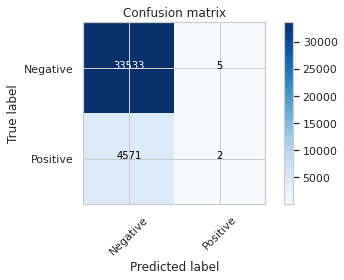

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.88      1.00      0.94     33538
    Positive       0.29      0.00      0.00      4573

    accuracy                           0.88     38111
   macro avg       0.58      0.50      0.47     38111
weighted avg       0.81      0.88      0.82     38111



The confusion matrix shows that the model has a high accuracy because it predicts almost all of the test data to be of Negative Response. Since 88% of the test data is composed from Negative Responses the model gets a high accuracy while it never predicts Positive Responses. The metric that better tracks this problem is the Macro Average f1 score since for its calculation, all classes contribute equally regardless of how often they appear in the dataset. This is going to be the metric that this project aims to maximize.
Another metric that also tracks the model's perfomance on both classes is the Area Under the Curve metric (AUC) and this is the reason it is selected as the metric monitored by the Early Stopping callback (whenever it is used).

<h3><b>Resampling</b></h3>

In order to do that, the problem that needs to be addressed is the imbalance that exists in the dataset where 84% of the Responses are Negative making the model's training very difficult. A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

A very important step in this procedure is to first split our data into train and test datasets and then apply Resampling only on the training set, and not the testing set, in order to test our model on original data.

The first step will be to undersample the majority class.

In [ ]:
#Count the amount of samples for each class.
unique_elements, counts_elements = np.unique(train_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [270884  37814]]


The code above prints samples for each class in the training set. We create our sampling strategy by copying the values for the second class. After that we undersample the first class to 200.000 samples and the a new model is created using the same parameteres as with the first one for better comparisons.

In [ ]:
# define undersample strategy
sampling_strategy1 = {0: 200000 , 1: 37814}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy1)
# fit and apply the transform
train_under, train_labels_under = undersample.fit_resample(train, train_labels)
print(Counter(train_labels_under))

Counter({0: 200000, 1: 37814})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_features = scaler.fit_transform(train_under)

<h4><b> Model 2 (Undersampled) <h4><b>

In [ ]:
model2 = make_model()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = model2.fit(
    train_under,
    train_labels_under,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
117/117 [==============================] - 5s 22ms/step - loss: 2266.6927 - tp: 6620.1186 - fp: 34933.5678 - tn: 97596.3051 - fn: 16958.1102 - accuracy: 0.6671 - precision: 0.1597 - recall: 0.2923 - auc: 0.5614 - val_loss: 0.8272 - val_tp: 3988.0000 - val_fp: 28493.0000 - val_tn: 1605.0000 - val_fn: 214.0000 - val_accuracy: 0.1631 - val_precision: 0.1228 - val_recall: 0.9491 - val_auc: 0.5877
Epoch 2/100
117/117 [==============================] - 2s 15ms/step - loss: 498.3894 - tp: 3738.3220 - fp: 19470.7203 - tn: 83000.4068 - fn: 15598.6525 - accuracy: 0.7121 - precision: 0.1613 - recall: 0.1941 - auc: 0.5021 - val_loss: 0.8570 - val_tp: 4116.0000 - val_fp: 29655.0000 - val_tn: 443.0000 - val_fn: 86.0000 - val_accuracy: 0.1329 - val_precision: 0.1219 - val_recall: 0.9795 - val_auc: 0.6002
Epoch 3/100
117/117 [==============================] - 2s 13ms/step - loss: 52.0631 - tp: 3758.6610 - fp: 19737.4661 - tn: 82745.1695 - fn: 15566.8051 - accuracy: 0.7184 - precision: 0.16

In [ ]:
predictions2 = model2.predict(test_features)

In [ ]:
predictions2 = sigmoid_to_class(predictions2)

Confusion matrix, without normalization
[[33417     0]
 [ 4694     0]]


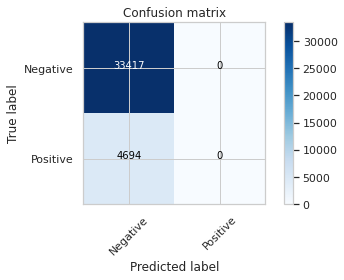

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions2, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.88      1.00      0.93     33417
    Positive       0.00      0.00      0.00      4694

    accuracy                           0.88     38111
   macro avg       0.44      0.50      0.47     38111
weighted avg       0.77      0.88      0.82     38111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Undersampling the Negative Responses to 200.000 did not affect the new model at all since it is still the only class that gets predicted. Let's try again undersampling the majority class even more, to 100.000.

In [ ]:
# define undersample strategy
sampling_strategy1 = {0: 100000 , 1: 37814}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy1)
# fit and apply the transform
train_under, train_labels_under = undersample.fit_resample(train, train_labels)
print(Counter(train_labels_under))

Counter({0: 100000, 1: 37814})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_features = scaler.fit_transform(train_under)

<h4><b> Model 3 (Undersampled)<h4><b>

In [ ]:
model3 = make_model()
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = model3.fit(
    train_under,
    train_labels_under,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
68/68 [==============================] - 4s 33ms/step - loss: 2463.8692 - tp: 8468.6087 - fp: 22105.3188 - tn: 59887.5797 - fn: 15446.7826 - accuracy: 0.6614 - precision: 0.2782 - recall: 0.3520 - auc: 0.5202 - val_loss: 1.1681 - val_tp: 4197.0000 - val_fp: 29939.0000 - val_tn: 159.0000 - val_fn: 5.0000 - val_accuracy: 0.1270 - val_precision: 0.1229 - val_recall: 0.9988 - val_auc: 0.5087
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 1121.5157 - tp: 5940.0145 - fp: 15936.6377 - tn: 36041.4928 - fn: 13690.1449 - accuracy: 0.5849 - precision: 0.2704 - recall: 0.3038 - auc: 0.4974 - val_loss: 1.1859 - val_tp: 4198.0000 - val_fp: 30038.0000 - val_tn: 60.0000 - val_fn: 4.0000 - val_accuracy: 0.1241 - val_precision: 0.1226 - val_recall: 0.9990 - val_auc: 0.5483
Epoch 3/100
68/68 [==============================] - 1s 14ms/step - loss: 546.0583 - tp: 5902.6957 - fp: 15757.6522 - tn: 36242.0000 - fn: 13705.9420 - accuracy: 0.5887 - precision: 0.2722 - reca

In [ ]:
predictions3 = model3.predict(test_features)

In [ ]:
predictions3 = sigmoid_to_class(predictions3)

Confusion matrix, without normalization
[[22998 10419]
 [ 2063  2631]]


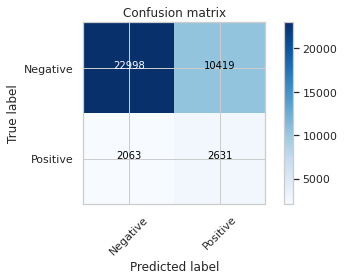

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions3, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.92      0.69      0.79     33417
    Positive       0.20      0.56      0.30      4694

    accuracy                           0.67     38111
   macro avg       0.56      0.62      0.54     38111
weighted avg       0.83      0.67      0.73     38111



Finally, the model starts predicting Positive Responses and it succefully found 2.631 clients that will have a Positve Response to a Vehicle Insurance. This of course came at a cost of total accurasy since 10.419 clients were predicted to have a Positive Response while it was Negative, giving us an accuracy of 67%. This loss is expected though considering we aim for the model to correctly predict both classes, in which it definitely got better, giving an Macro Average f1 score of 0.54 from 0.47.

In one final attempt, the minority class (Negative Response) is oversampled to 60.000 from 37.814 samples, in order to increase the quantity (hopefully the quality as well) of the model's predictions for Positive Responses. 

In [ ]:
# define oversampling strategy
sampling_strategy2 = {0: 100000, 1: 60000}
oversample = RandomOverSampler(sampling_strategy=sampling_strategy2)
# fit and apply the transform
train_under, train_labels_under = oversample.fit_resample(train_under, train_labels_under)
print(Counter(train_labels_under))                            

Counter({0: 100000, 1: 60000})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<h4><b> Model 4 (Oversampled) <h4><b>

In [ ]:
train_features = scaler.fit_transform(train_under)

In [ ]:
model4 = make_model()
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = model4.fit(
    train_under,
    train_labels_under,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
79/79 [==============================] - 4s 28ms/step - loss: 2223.0876 - tp: 17192.9625 - fp: 28856.8500 - tn: 53046.6000 - fn: 18077.1875 - accuracy: 0.6190 - precision: 0.3723 - recall: 0.5081 - auc: 0.5526 - val_loss: 0.8971 - val_tp: 3326.0000 - val_fp: 27287.0000 - val_tn: 2811.0000 - val_fn: 876.0000 - val_accuracy: 0.1789 - val_precision: 0.1086 - val_recall: 0.7915 - val_auc: 0.2867
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 453.3015 - tp: 11684.3250 - fp: 19754.2375 - tn: 32057.7875 - fn: 19377.2500 - accuracy: 0.5278 - precision: 0.3715 - recall: 0.3749 - auc: 0.4971 - val_loss: 0.8908 - val_tp: 3938.0000 - val_fp: 29150.0000 - val_tn: 948.0000 - val_fn: 264.0000 - val_accuracy: 0.1424 - val_precision: 0.1190 - val_recall: 0.9372 - val_auc: 0.3601
Epoch 3/100
79/79 [==============================] - 1s 15ms/step - loss: 25.5536 - tp: 11987.2000 - fp: 19859.0375 - tn: 31904.1125 - fn: 19123.2500 - accuracy: 0.5323 - precision: 0.3744

In [ ]:
predictions4 = model4.predict(test_features)

In [ ]:
predictions4 = sigmoid_to_class(predictions4)

Confusion matrix, without normalization
[[21283 12134]
 [  559  4135]]


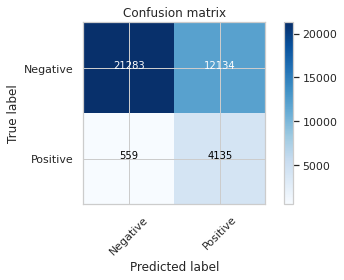

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions4)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions4, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.97      0.64      0.77     33417
    Positive       0.25      0.88      0.39      4694

    accuracy                           0.67     38111
   macro avg       0.61      0.76      0.58     38111
weighted avg       0.89      0.67      0.72     38111



The model improves even more. Without sacrifising its accuracy since it is still at 67%, the model finds 88% of the Positive Responses in the test dataset, only missing 559 clients.

<h3><b> Cost-Sensitive Neural Networks <b><h3>

Using resampling on the dataset, definitely improved the model's perfomance but there is room for even more improvement. Resampling is a generic solution when solving machine learning problems on imbalanced datasets. However, another method exists for imbalanced datasets which is Neural Network specific.

Neural networks are trained using the backpropagation of error algorithm that involves calculating errors made by the model on the training dataset and updating the model weights in proportion to those errors. The limitation of this method of training is that examples from each class are treated the same, which for imbalanced datasets means that the model is adapted a lot more for one class than another.

The backpropagation algorithm can be updated to weigh misclassification errors in proportion to the importance of the class, referred to as weighted neural networks or cost-sensitive neural networks. This has the effect of allowing the model to pay more attention to examples from the minority class than the majority class in datasets with a severely skewed class distribution.

<h4><b> Model 5 (Cost-Sensitive NN) <h4><b>

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

For example, the class distribution of the train dataset is a 46.710:334.399 ratio that is equal to a 14:100 ratio for the minority class to the majority class. The invert of this ratio could be used with 14 for the majority class and 100 for the minority class.

The next three models use the same architecture but different ratio's in order to better compare them. The architecture consists of one hidden layer of 10 neurons with the relu activation function and one output layer of one sigmoid neuron. The initial random weights are defined by the He Uniform initializers while the model uses Stochastic Gradient Descent as its optimizer. The same Early Stopping procedure is used in these models as well.

In [ ]:
train_features = scaler.fit_transform(train)

In [ ]:
# class weighted neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential
 
# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model5 = define_model(n_input)
# fit model
weights = {0:14, 1:100}
history = model5.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [early_stopping], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 15ms/step - loss: 13.6066 - tp: 21128.4671 - fp: 66680.5789 - tn: 100859.9803 - fn: 2282.2632 - accuracy: 0.6371 - precision: 0.2382 - recall: 0.8898 - auc: 0.7982 - val_loss: 0.4996 - val_tp: 4128.0000 - val_fp: 11984.0000 - val_tn: 18022.0000 - val_fn: 166.0000 - val_accuracy: 0.6458 - val_precision: 0.2562 - val_recall: 0.9613 - val_auc: 0.8276
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 10.9169 - tp: 18366.7434 - fp: 54325.5263 - tn: 83224.5526 - fn: 734.4671 - accuracy: 0.6481 - precision: 0.2529 - recall: 0.9631 - auc: 0.8333 - val_loss: 0.4771 - val_tp: 4049.0000 - val_fp: 11426.0000 - val_tn: 18580.0000 - val_fn: 245.0000 - val_accuracy: 0.6597 - val_precision: 0.2616 - val_recall: 0.9429 - val_auc: 0.8334
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 10.7726 - tp: 18264.5329 - fp: 53106.7500 - tn: 84456.1053 - fn: 823.9013 - accuracy: 0.6562 - precision: 0.2563

In [ ]:
predictions5 = model5.predict(test_features)

In [ ]:
predictions5 = sigmoid_to_class(predictions5)

Confusion matrix, without normalization
[[21796 11585]
 [  270  4460]]


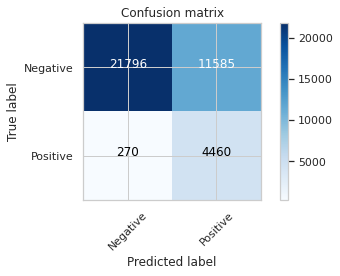

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions5)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions5, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.99      0.65      0.79     33381
    Positive       0.28      0.94      0.43      4730

    accuracy                           0.69     38111
   macro avg       0.63      0.80      0.61     38111
weighted avg       0.90      0.69      0.74     38111



Success! With a slight better accuracy (0.69 from 0.67) the model is also able to find almost all (4460 from 4135) of the clients that will have a Positive Response, giving a Macro Average f1 score of 0.61 (from 0.58). Lets see if it is possible to achieve an even higher Macro Average f1 score, hence an even better model, by adjusting the ratio in favor of the majority class.

<h4><b> Model 6 (Cost-Sensitive NN) <h4><b>

In [ ]:
# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model6 = define_model(n_input)
# fit model
weights = {0:28, 1:100}
history = model6.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [early_stopping], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 15ms/step - loss: 19.4560 - tp: 15884.8355 - fp: 41405.4079 - tn: 126164.6776 - fn: 7496.3684 - accuracy: 0.7360 - precision: 0.2722 - recall: 0.6847 - auc: 0.8016 - val_loss: 0.3665 - val_tp: 3064.0000 - val_fp: 6896.0000 - val_tn: 23110.0000 - val_fn: 1230.0000 - val_accuracy: 0.7631 - val_precision: 0.3076 - val_recall: 0.7136 - val_auc: 0.8323
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 15.7847 - tp: 14086.2763 - fp: 32116.6184 - tn: 105380.4605 - fn: 5067.9342 - accuracy: 0.7631 - precision: 0.3034 - recall: 0.7299 - auc: 0.8355 - val_loss: 0.3649 - val_tp: 3263.0000 - val_fp: 7298.0000 - val_tn: 22708.0000 - val_fn: 1031.0000 - val_accuracy: 0.7572 - val_precision: 0.3090 - val_recall: 0.7599 - val_auc: 0.8374
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 15.6011 - tp: 14306.2895 - fp: 32779.9342 - tn: 104780.0461 - fn: 4785.0197 - accuracy: 0.7602 - precision: 0.

In [ ]:
predictions6 = model6.predict(test_features)

In [ ]:
predictions6 = sigmoid_to_class(predictions6)

Confusion matrix, without normalization
[[25189  8192]
 [  954  3776]]


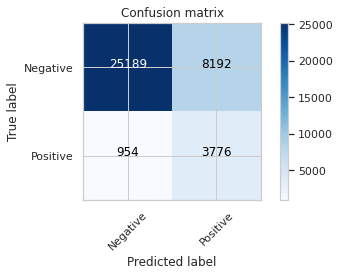

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions6)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions6, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.96      0.75      0.85     33381
    Positive       0.32      0.80      0.45      4730

    accuracy                           0.76     38111
   macro avg       0.64      0.78      0.65     38111
weighted avg       0.88      0.76      0.80     38111



The Macro Average f1 score is improved to 0.65 from 0.61. In one final attempt, the ratio is adjusted even more to the majority class's favor in order to achieve even higher Macro Average f1 score.

<h4><b> Model 7 (Cost-Sensitive NN) <h4><b>

In [ ]:
# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model7 = define_model(n_input)
# fit model
weights = {0:35, 1:100}
history = model7.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [early_stopping], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 15ms/step - loss: 21.2256 - tp: 12412.0921 - fp: 29058.2566 - tn: 138513.2368 - fn: 10967.7039 - accuracy: 0.7890 - precision: 0.2957 - recall: 0.5217 - auc: 0.8053 - val_loss: 0.3404 - val_tp: 2933.0000 - val_fp: 6214.0000 - val_tn: 23792.0000 - val_fn: 1361.0000 - val_accuracy: 0.7792 - val_precision: 0.3207 - val_recall: 0.6830 - val_auc: 0.8388
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 17.4814 - tp: 12450.6250 - fp: 27220.3289 - tn: 110275.6447 - fn: 6704.6908 - accuracy: 0.7833 - precision: 0.3146 - recall: 0.6503 - auc: 0.8376 - val_loss: 0.3319 - val_tp: 2966.0000 - val_fp: 6234.0000 - val_tn: 23772.0000 - val_fn: 1328.0000 - val_accuracy: 0.7795 - val_precision: 0.3224 - val_recall: 0.6907 - val_auc: 0.8409
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 17.2998 - tp: 12825.2039 - fp: 27714.5724 - tn: 109814.0197 - fn: 6297.4934 - accuracy: 0.7828 - precision: 0

In [ ]:
predictions7 = model7.predict(test_features)

In [ ]:
predictions7 = sigmoid_to_class(predictions7)

Confusion matrix, without normalization
[[26802  6579]
 [ 1477  3253]]


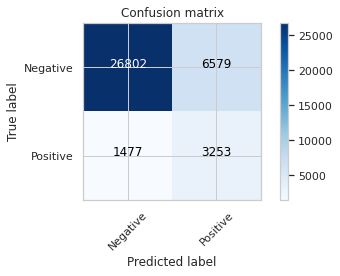

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions7, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.95      0.80      0.87     33381
    Positive       0.33      0.69      0.45      4730

    accuracy                           0.79     38111
   macro avg       0.64      0.75      0.66     38111
weighted avg       0.87      0.79      0.82     38111



The highest Macro Average f1 score until this point is achieved with a value of 0.66 while the accuracy is at 0.79. This model is the most balanced one since it offers a respectable accuracy while it predicts both of the classes.

<h4><b> Model 8 (Cost-Sensitive NN) <h4><b>

In this final part, the ratio for the weights stays the same, while different architectures are used for the Neural Networks.
The following, bigger network consists of 2 hiddel layers with 16 and 32 neuron, using the relu activation function and an output layer of one sigmoid neuron. In this case the adam optimizer is used.

In [ ]:
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(16, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define second hidder layer
	model.add(Dense(32, activation='relu'))
  # define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model8 = define_model(n_input)
# fit model
weights = {0:35, 1:100}
history = model8.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [early_stopping], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 15ms/step - loss: 27.0171 - tp: 7803.5329 - fp: 30411.2171 - tn: 137172.6118 - fn: 15563.9276 - accuracy: 0.7323 - precision: 0.2035 - recall: 0.4001 - auc: 0.6932 - val_loss: 0.3504 - val_tp: 1423.0000 - val_fp: 3145.0000 - val_tn: 26861.0000 - val_fn: 2871.0000 - val_accuracy: 0.8246 - val_precision: 0.3115 - val_recall: 0.3314 - val_auc: 0.8132
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 18.2904 - tp: 9187.1513 - fp: 20464.3158 - tn: 117071.2697 - fn: 9928.5526 - accuracy: 0.8097 - precision: 0.3097 - recall: 0.4549 - auc: 0.8250 - val_loss: 0.3425 - val_tp: 2757.0000 - val_fp: 5994.0000 - val_tn: 24012.0000 - val_fn: 1537.0000 - val_accuracy: 0.7804 - val_precision: 0.3150 - val_recall: 0.6421 - val_auc: 0.8328
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 17.4956 - tp: 11889.0132 - fp: 25956.5987 - tn: 111587.3158 - fn: 7218.3618 - accuracy: 0.7878 - precision: 0.3

In [ ]:
predictions8 = model8.predict(test_features)

In [ ]:
predictions8 = sigmoid_to_class(predictions8)

Confusion matrix, without normalization
[[27130  6251]
 [ 1569  3161]]


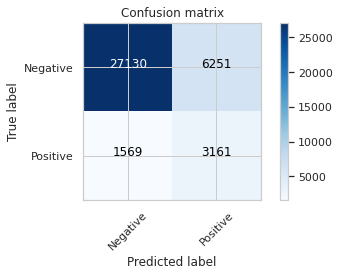

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions8)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions8, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.95      0.81      0.87     33381
    Positive       0.34      0.67      0.45      4730

    accuracy                           0.79     38111
   macro avg       0.64      0.74      0.66     38111
weighted avg       0.87      0.79      0.82     38111



The results are almost identical.

<h4><b> Model 9 (Cost-Sensitive NN) <b><h4>

The following networks is composed from one hiden layer only of 60 neurons using the relu activation function. Instead of using the early stopping callback, this model used the ReduceLROnPlateau callback that reduces learning rate by a factor of 0.2 if the selected metric (val_auc) is not improved over 5 epochs.



In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_auc', 
    factor=0.2,
    verbose=1,
    patience=5,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0)

In [ ]:
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(60, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model9 = define_model(n_input)
# fit model
weights = {0:35, 1:100}
history = model9.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [reduce_lr], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 15ms/step - loss: 23.3551 - tp: 10241.6118 - fp: 25984.4934 - tn: 141575.8487 - fn: 13149.3355 - accuracy: 0.7910 - precision: 0.2798 - recall: 0.4457 - auc: 0.7654 - val_loss: 0.3445 - val_tp: 2236.0000 - val_fp: 4654.0000 - val_tn: 25352.0000 - val_fn: 2058.0000 - val_accuracy: 0.8043 - val_precision: 0.3245 - val_recall: 0.5207 - val_auc: 0.8335
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 17.8399 - tp: 10965.9408 - fp: 23463.3553 - tn: 113970.8289 - fn: 8251.1645 - accuracy: 0.7973 - precision: 0.3176 - recall: 0.5658 - auc: 0.8367 - val_loss: 0.3327 - val_tp: 2566.0000 - val_fp: 5205.0000 - val_tn: 24801.0000 - val_fn: 1728.0000 - val_accuracy: 0.7979 - val_precision: 0.3302 - val_recall: 0.5976 - val_auc: 0.8410
Epoch 3/100
151/151 [==============================] - 1s 9ms/step - loss: 17.4415 - tp: 11820.9342 - fp: 25005.2763 - tn: 112493.1118 - fn: 7331.9671 - accuracy: 0.7933 - precision: 0

In [ ]:
predictions9 = model9.predict(test_features)

In [ ]:
predictions9 = sigmoid_to_class(predictions9)

Confusion matrix, without normalization
[[26829  6552]
 [ 1507  3223]]


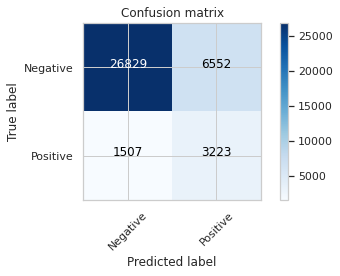

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions9)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions9, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.95      0.80      0.87     33381
    Positive       0.33      0.68      0.44      4730

    accuracy                           0.79     38111
   macro avg       0.64      0.74      0.66     38111
weighted avg       0.87      0.79      0.82     38111



The results remain similar.

<h4><b> Model 10 (Cost-Sensitive NN) <b><h4>

This final network uses two hidden layers of 60 and 30 neurons that use the relu activation function and one output layer of one sigmoid neuron. The Reduce Learning rate callback is used again but in this case the RMSprop optimizer is used with a learning rate of 0.1.

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

def define_model(n_input):
  
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(60, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  # define second hidden layer
	model.add(Dense(30, activation='relu'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=METRICS)
	return model
 
# get the model
n_input = train_features.shape[-1]
model10 = define_model(n_input)
# fit model
weights = {0:35, 1:100}
history = model10.fit(train_features, train_labels, class_weight=weights, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [reduce_lr], validation_data=(val_features, val_labels))

Epoch 1/100
151/151 [==============================] - 4s 17ms/step - loss: 46.6033 - tp: 15028.3487 - fp: 34654.0197 - tn: 132836.9013 - fn: 8432.0197 - accuracy: 0.7788 - precision: 0.3052 - recall: 0.6218 - auc: 0.8225 - val_loss: 0.3391 - val_tp: 2852.0000 - val_fp: 6020.0000 - val_tn: 23986.0000 - val_fn: 1442.0000 - val_accuracy: 0.7824 - val_precision: 0.3215 - val_recall: 0.6642 - val_auc: 0.8291
Epoch 2/100
151/151 [==============================] - 2s 11ms/step - loss: 17.7041 - tp: 13992.1184 - fp: 32504.4474 - tn: 105072.1447 - fn: 5082.5789 - accuracy: 0.7569 - precision: 0.2983 - recall: 0.7414 - auc: 0.8291 - val_loss: 0.3617 - val_tp: 3499.0000 - val_fp: 8027.0000 - val_tn: 21979.0000 - val_fn: 795.0000 - val_accuracy: 0.7428 - val_precision: 0.3036 - val_recall: 0.8149 - val_auc: 0.8354
Epoch 3/100
151/151 [==============================] - 2s 10ms/step - loss: 17.6432 - tp: 14574.3618 - fp: 33840.2105 - tn: 103771.1908 - fn: 4465.5263 - accuracy: 0.7552 - precision: 0

In [ ]:
predictions10 = model10.predict(test_features)

In [ ]:
predictions10 = sigmoid_to_class(predictions10)

Confusion matrix, without normalization
[[27245  6136]
 [ 1586  3144]]


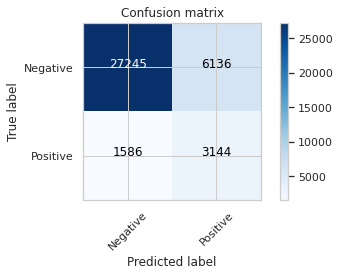

In [ ]:
cnf_matrix = confusion_matrix(test_labels, predictions10)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Negative','Positive'],
                      title='Confusion matrix')

In [ ]:
print('\nClassification Report\n')
print(classification_report(test_labels, predictions10, target_names=['Negative','Positive']))


Classification Report

              precision    recall  f1-score   support

    Negative       0.94      0.82      0.88     33381
    Positive       0.34      0.66      0.45      4730

    accuracy                           0.80     38111
   macro avg       0.64      0.74      0.66     38111
weighted avg       0.87      0.80      0.82     38111



Even if the difference is extremely slight on the accuracy (from 0.79 to 0.80) the current model is the winner since it achieved the highest accuracy while having equal Macro Average f1 score equal to the highest value recorded in this project for this dataset from the previous models.

In [ ]:
#Save the wining models
model5.save("Best Positive Response Predictor")
model10.save("Best Predictor Overall")
print("Saved models to disk")

INFO:tensorflow:Assets written to: Best Positive Response Predictor/assets
INFO:tensorflow:Assets written to: Best Predictor Overall/assets
Saved models to disk


In [ ]:
#Copy the files to the Drive
!cp -a /content/Best\ Positive\ Response\ Predictor /content/drive/MyDrive/Colab\ Notebooks
!cp -a /content/Best\ Predictor\ Overall /content/drive/MyDrive/Colab\ Notebooks

<h2><b>6. Conclusions</b></h2>

<p>After exploring the various features of the dataset an effort was made in order to address the biggest problem in the particular dataset, the imbalance on the target variable, Response. As it was mentioned, only 12% of the clients are interested in a Vehicle Insurance, hindering the proccess of creating model that predicts Positive Responses.<p>
<p>The first method that was used, the generic solution for Imbalanced Machine Learning problems, provided by the Python library imblearn, called Resampling definitely improved the results. When Resampling was not used the model did not managed to find a single client that will have a Positive Response. After using Resampling the model found 4.135 of the 4.694 Positive Responses on the test dataset while maintaining a respectable accuracy of 67%.<p>
<p>A Neural Network specific method was used next, in which Cost-Sensitive Neural Networks are created that adapt better on the dataset's imbalance. This method improved the results slightly, as expected and after experimenting on the correct ratio, a Neural Network was created that achieved a 80% accuracy while correctly predicting 3.144 of the 4.694 Positive Responses on the test dataset.<p>
A recommendation for future projects would be to experiment even more with various Neural Network architectures while trying different class ratios for the weights or even different feature combinations for the training dataset.